## Decision trees

- Reference: <a href="http://www-bcf.usc.edu/~gareth/ISL/">Introduction to Statistical Learning</a>, Chapter 8

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [47]:
X_raw = np.loadtxt(open("HittersNoSchmidtNorKennedy.csv", "rb"), delimiter=",", skiprows=1, usecols=(2, 7, 19))
# Make years the first column and hits the second.
X_raw[:, 0], X_raw[:, 1] = X_raw[:, 1], X_raw[:, 0].copy()
i = X_raw[:, 2] >= 0
X = X_raw[i, :2]
y = np.round(X_raw[i, 2])

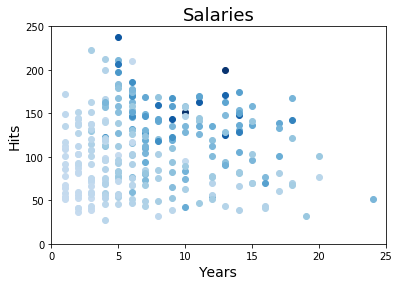

In [4]:
cm = plt.get_cmap('Blues')
scaled_salaries = (y - np.min(y))/(np.max(y) - np.min(y))*0.75 + 0.25
plt.xlim(0, 25)
plt.ylim(0, 250)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Hits", fontsize=14)
plt.title("Salaries", fontsize=18)
for i in range(len(X)):
    plt.plot(X[i,0], X[i,1], 'o', color=cm(scaled_salaries[i]))
plt.show()

[ 1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5 14.5
 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5]
3 4.5 35984149.37434314


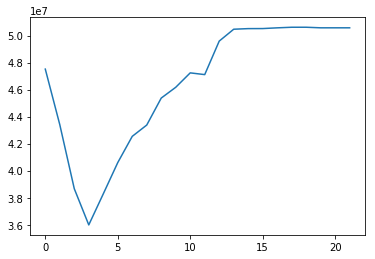

In [31]:
x = X[:,0] # years in league
I = np.arange(np.min(x) + 0.5, np.max(x) - 0.5, 1)
rss = []
print(I)
for s in I:
    x_left = x[x < s]
    x_right = x[x > s]
    y_left = y[x < s]
    y_right = y[x > s]
    y_left_rss = np.sum((y_left - np.mean(y_left))**2)
    y_right_rss = np.sum((y_right - np.mean(y_right))**2)
    rss.append(y_left_rss + y_right_rss)
plt.plot(rss)
print(np.argmin(rss), I[np.argmin(rss)], np.min(rss))

95 122.5 38185531.883832775


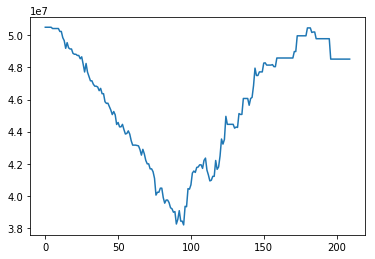

In [33]:
x = X[:,1] # hits
I = np.arange(np.min(x) + 0.5, np.max(x) - 0.5, 1)
rss = []
for s in I:
    x_left = x[x < s]
    x_right = x[x > s]
    y_left = y[x < s]
    y_right = y[x > s]
    y_left_rss = np.sum((y_left - np.mean(y_left))**2)
    y_right_rss = np.sum((y_right - np.mean(y_right))**2)
    rss.append(y_left_rss + y_right_rss)
plt.plot(rss)
print(np.argmin(rss), I[np.argmin(rss)], np.min(rss))
35984149
38185531

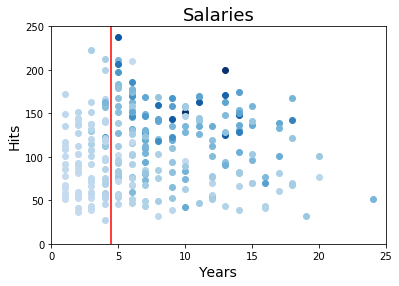

In [34]:
cm = plt.get_cmap('Blues')
scaled_salaries = (y - np.min(y))/(np.max(y) - np.min(y))*0.75 + 0.25
plt.xlim(0, 25)
plt.ylim(0, 250)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Hits", fontsize=14)
plt.title("Salaries", fontsize=18)
for i in range(len(X)):
    plt.plot(X[i,0], X[i,1], 'o', color=cm(scaled_salaries[i]))
plt.plot([4.5, 4.5], [0, 250], 'r')
plt.show()

[1.5 2.5 3.5]
2 3.5 1922264.0404761906
85 112.5 2044598.8333333333


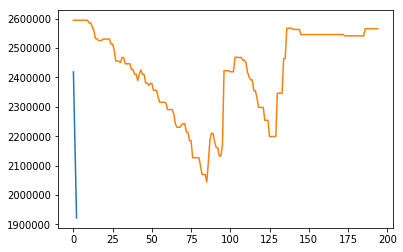

In [68]:
XX = X[X[:,0] < 4.5, :]
yy = y[X[:,0] < 4.5]

x = XX[:,0] # years in league
I = np.arange(np.min(x) + 0.5, np.max(x) + 0.5, 1)
rss = []
print(I)
for s in I:
    x_left = x[x < s]
    x_right = x[x > s]
    y_left = yy[x < s]
    y_right = yy[x > s]
    y_left_rss = np.sum((y_left - np.mean(y_left))**2)
    y_right_rss = np.sum((y_right - np.mean(y_right))**2)
    rss.append(y_left_rss + y_right_rss)
plt.plot(rss)
print(np.argmin(rss), I[np.argmin(rss)], np.min(rss))

x = XX[:,1] # years in league
I = np.arange(np.min(x) + 0.5, np.max(x) - 0.5, 1)
rss = []
for s in I:
    x_left = x[x < s]
    x_right = x[x > s]
    y_left = yy[x < s]
    y_right = yy[x > s]
    y_left_rss = np.sum((y_left - np.mean(y_left))**2)
    y_right_rss = np.sum((y_right - np.mean(y_right))**2)
    rss.append(y_left_rss + y_right_rss)
plt.plot(rss)
print(np.argmin(rss), I[np.argmin(rss)], np.min(rss))

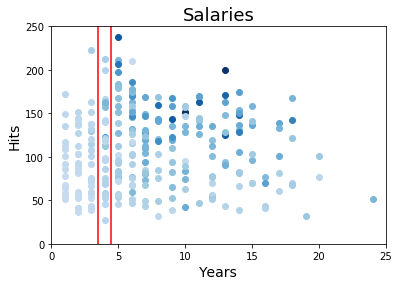

In [69]:
cm = plt.get_cmap('Blues')
scaled_salaries = (y - np.min(y))/(np.max(y) - np.min(y))*0.75 + 0.25
plt.xlim(0, 25)
plt.ylim(0, 250)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Hits", fontsize=14)
plt.title("Salaries", fontsize=18)
for i in range(len(X)):
    plt.plot(X[i,0], X[i,1], 'o', color=cm(scaled_salaries[i]))
plt.plot([4.5, 4.5], [0, 250], 'r')
plt.plot([3.5, 3.5], [0, 250], 'r')
plt.show()

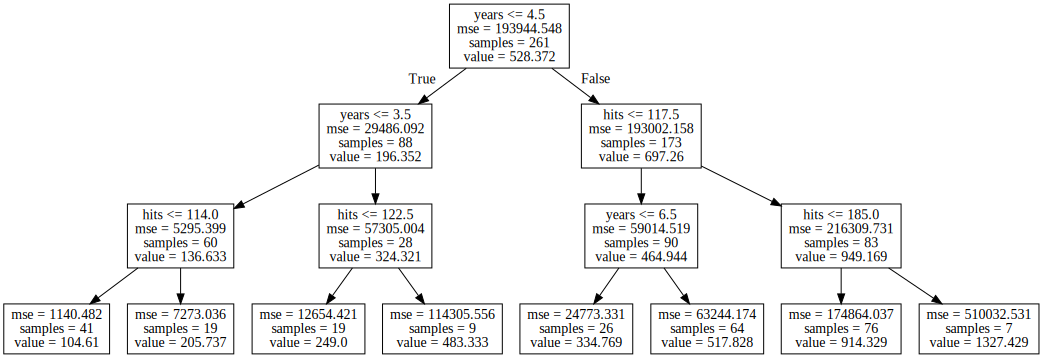

In [76]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from graphviz import Source
R = DecisionTreeRegressor(max_depth=3)
R.fit(X, y)
T = R.tree_
t = export_graphviz(R, out_file=None, max_depth=3, feature_names=["years", "hits"])
t_graphviz = Source(t)
t_graphviz

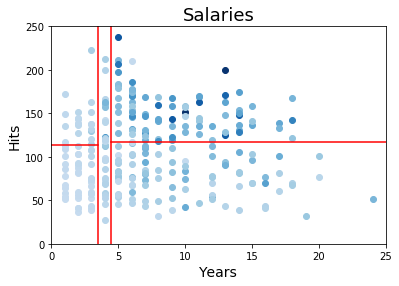

In [77]:
cm = plt.get_cmap('Blues')
scaled_salaries = (y - np.min(y))/(np.max(y) - np.min(y))*0.75 + 0.25
plt.xlim(0, 25)
plt.ylim(0, 250)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Hits", fontsize=14)
plt.title("Salaries", fontsize=18)
for i in range(len(X)):
    plt.plot(X[i,0], X[i,1], 'o', color=cm(scaled_salaries[i]))
plt.plot([4.5, 4.5], [0, 250], 'r')
plt.plot([3.5, 3.5], [0, 250], 'r')
plt.plot([4.5, 25], [117.5, 117.5], 'r')
plt.plot([0, 3.5], [114, 114], 'r')
plt.show()

In [73]:
print(R.predict([[2, 100]]))
print(R.predict([[20, 200]]))

[136.63333333]
[949.1686747]


### Exercise

1. Repeat the above analysis, i.e., regression of salary onto years and hits.

   1. Divide the dataset into a training set and a testing set.
   2. Partition the parameter space into eight regions.
   3. Based on your results, write a function to predict salary given years and hits.
   4. Compute error using your testing set.

2. Repeat the analysis (yet again) using bagging. How does the out-of-box error estimate compare with your test error from the previous problem?

3. Produce a classifier for the famous <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html">iris dataset</a> using bagging of decision trees. What's your out-of-box misclassification rate? Compare with $k$-nearest neighbors.




### Classification

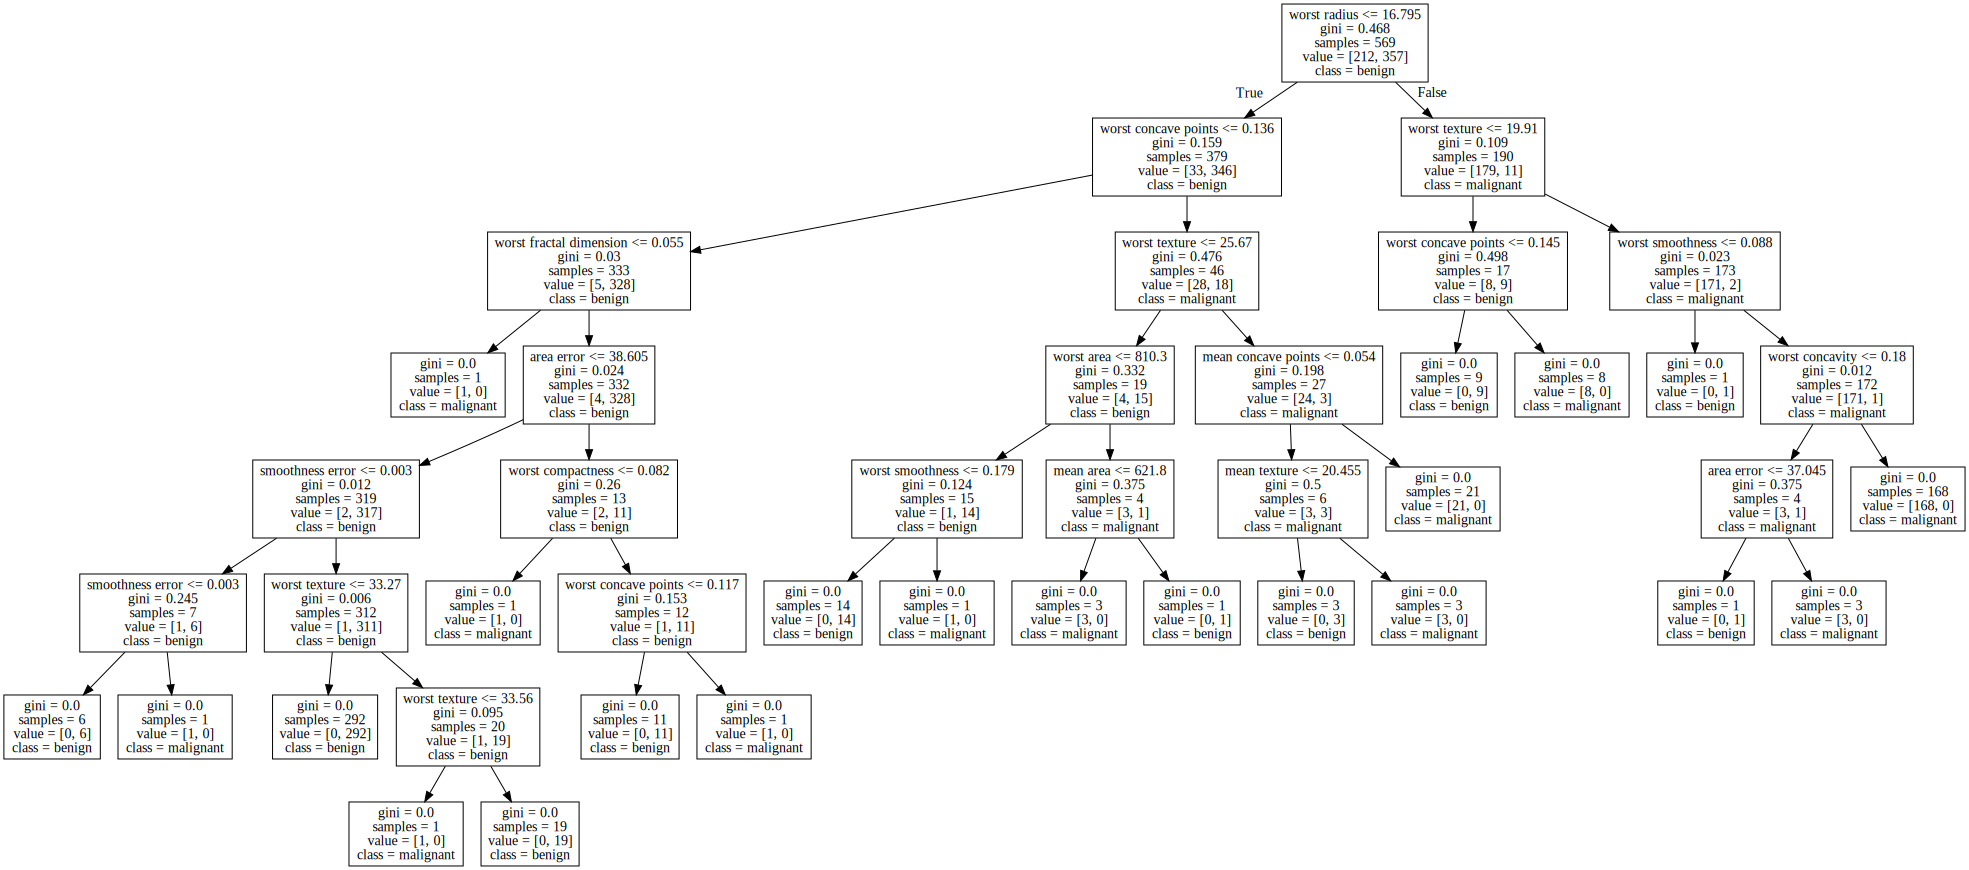

In [91]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
data = load_breast_cancer()
X = data.data
y = data.target
C = DecisionTreeClassifier()
C.fit(X, y)
t = export_graphviz(C, out_file=None, feature_names=data.feature_names, class_names=data.target_names)
t_graphviz = Source(t)
t_graphviz

In [92]:
len(C.tree_.children_left)

43